# Take home task


Welcome to your take home task. Congrats on making it to the next stage. This task should take around 20 minutes. There are four stages:
* Stage 1: Data Cleaning
* Stage 2: Model Buliding
* Stage 3: Model Evaluation
* Stage 4: Data Visualisation

You will be using the titanic dataset to build a simple Logistic Regression Model and then evaluating the performance of your mode. Please make a copy of this notebook. Once you have completed the task submit your Notebook file via the Ashby submission link in the original email. If you incur any issues please contact your talent partner.
Good luck and have fun

# Stage 1: Data Cleaning

* Load the attatched dataset and clean the data
* You should drop any duplicates values
* You should drop any null values
* You should drop PassengerId, Name, SibSp, Ticket, Cabin, Embarked, Sex columns
* Below is an example of what your data should look like


All relevant libraries have been allready imported for you (please ensure that you have them installed)

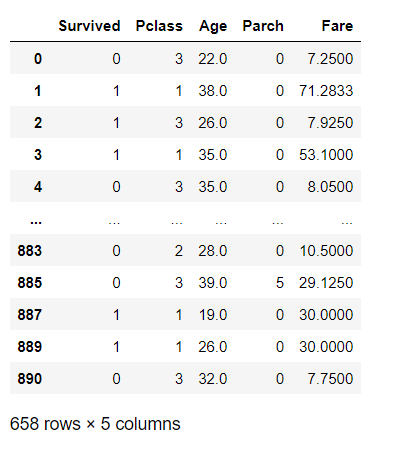

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
# downloading the dataset into /contents/ so it can be used for the exercise
# the filepath you can use is /content/titanic.csv to load your dataset
!gdown --id "1ZdhoVnOZIUs1X5qAja7hKQH-5QwYMmLE"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZdhoVnOZIUs1X5qAja7hKQH-5QwYMmLE
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 101MB/s]


In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace=True)
df.head()

,Survived,Pclass,Age,Parch,Fare
0,0,3,22.0,0,7.2500
1,1,1,38.0,0,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,0,53.1000
4,0,3,35.0,0,8.0500


In [ ]:
print(df.shape, df.duplicated().sum())

(891, 5) 143


In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)
print(df.shape, df.duplicated().sum())

(748, 5) 0


In [ ]:
df.isnull().sum()

Survived     0
Pclass       0
Age         90
Parch        0
Fare         0
dtype: int64

In [ ]:
df.dropna(inplace=True)
print(df.shape)
print(df.isnull().sum())

(658, 5)
Survived    0
Pclass      0
Age         0
Parch       0
Fare        0
dtype: int64


# Stage 2: Model Building

* You will now build a simple Logistic Regression model using the sklearn library
* You should use the following columns as your features Pclass, Age, Parch, Fare for your X values
* The Y value should be the survived column


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Parch', 'Fare'], dtype='object')

In [ ]:
model = LogisticRegression()
Y = df['Survived']
X = df[['Pclass', 'Age', 'Parch', 'Fare']]
X.head()

,Pclass,Age,Parch,Fare
0,3,22.0,0,7.2500
1,1,38.0,0,71.2833
2,3,26.0,0,7.9250
3,1,35.0,0,53.1000
4,3,35.0,0,8.0500


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

# Stage 3: Model Evaluation

* Check the score of your model for the train values
* Check the score of your model for the test values
* Produce a classification report for your y values



In [ ]:
model.score(X_train,Y_train)

0.6977186311787072

In [ ]:
model.score(X_test,Y_test)

0.6893939393939394

In [ ]:
Y_pred = model.predict(X)

In [ ]:
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       382
           1       0.69      0.50      0.58       276

    accuracy                           0.70       658
   macro avg       0.69      0.67      0.67       658
weighted avg       0.69      0.70      0.69       658



# Stage 4: Data Visualisation

* Produce a confusion matrix for your model
* Plot a ROC curve for your model


In [ ]:
confusion_matrix(Y,Y_pred)

array([[319,  63],
       [137, 139]])

In [ ]:
roc_curve(Y,Y_pred)

(array([0.        , 0.16492147, 1.        ]),
 array([0.        , 0.50362319, 1.        ]),
 array([2, 1, 0]))

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(Y, Y_pred)

<ipython-input-51-6d61b5aadf05>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


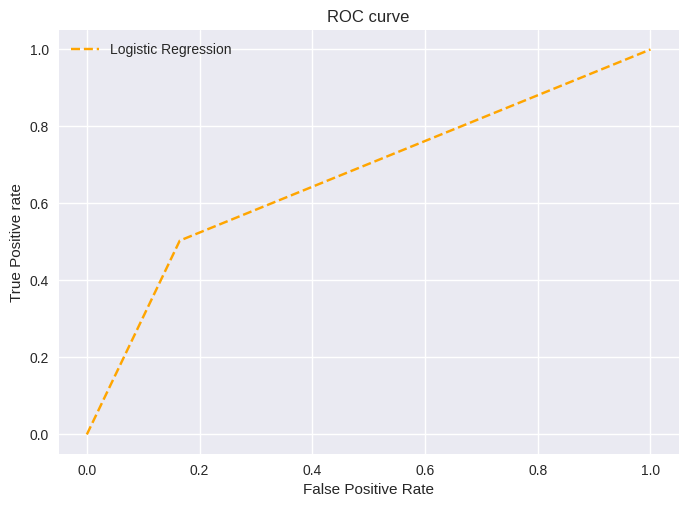

In [ ]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();